In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

In [19]:
action_to_desc = {
        "bend and pull full" : 0,
        "countermovement jump" : 1,
        "left countermovement jump" : 2,
        "left lunge and twist" : 3,
        "left lunge and twist full" : 4,
        "right countermovement jump" : 5,
        "right lunge and twist" : 6,
        "right lunge and twist full" : 7,
        "right single leg squat" : 8,
        "squat" : 9,
        "bend and pull" : 10,
        "left single leg squat" : 11,
        "push up" : 12
    }

def load_train_embeddings(directory='embeddings'):
    # directory = os.path.join(args.out_dir, 'embeddings')
        
    embedding_dict = {}
    
    for filename in os.listdir('embeddings'):
        if filename.endswith(".npy"):
            key = filename.split('.')[0]
            embedding = np.load('embeddings/'+filename)
            if len(embedding)==0:
                continue
            
            embedding_dict[action_to_desc[key]] = embedding
    
    return embedding_dict

In [20]:
embedding_dict = load_train_embeddings()
print(embedding_dict.keys())
print("Completing loading training embeddings:")
for k,v in embedding_dict.items():
    print(k,v.shape)

dict_keys([9])
Completing loading training embeddings:
9 (71, 512, 49)


In [21]:
embedding = embedding_dict[9]

In [22]:
print(embedding.shape)
embedding = torch.tensor(embedding)
print(embedding.shape, embedding.dtype)

(71, 512, 49)
torch.Size([71, 512, 49]) torch.float32


/tmp/ipykernel_1448809/3286874197.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], cmap='viridis', s=50, label="Embeddings")


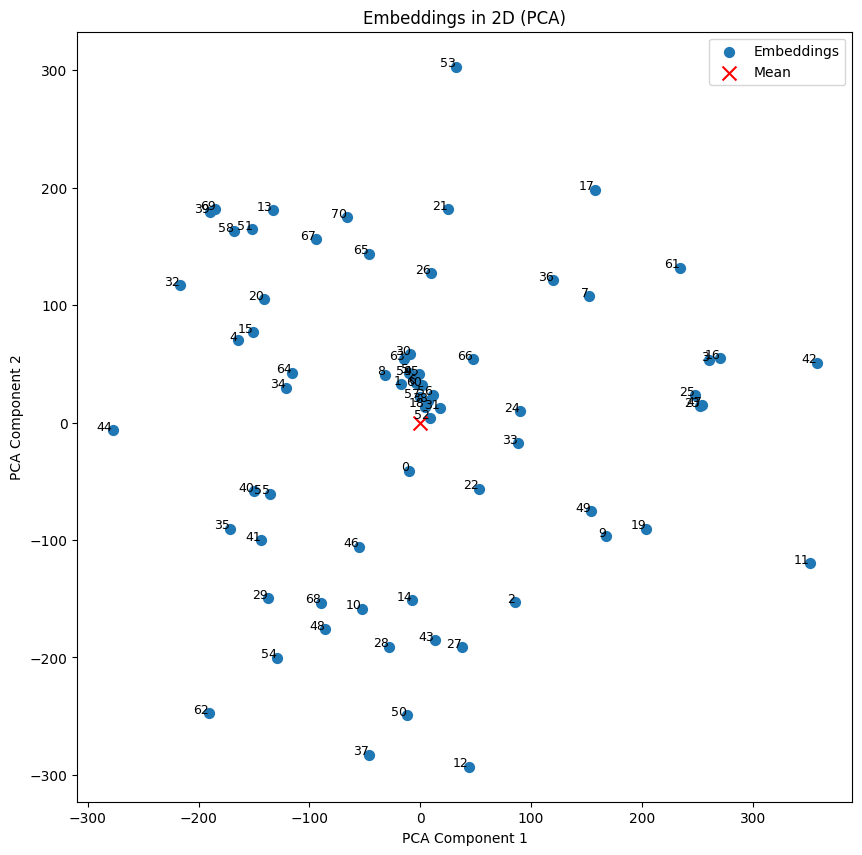

In [23]:
embedding_flattened = embedding.view(71, -1).detach().cpu().numpy()

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
embedding_2d = pca.fit_transform(embedding_flattened)

# Calculate the mean in the 2D PCA space
mean_embedding_2d = embedding_2d.mean(axis=0)

# Plot the embeddings in 2D
plt.figure(figsize=(10, 10))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], cmap='viridis', s=50, label="Embeddings")

# Label each point with its index
for i in range(embedding_2d.shape[0]):
    plt.text(embedding_2d[i, 0], embedding_2d[i, 1], str(i), fontsize=9, ha='right')

# Plot the mean point
plt.scatter(mean_embedding_2d[0], mean_embedding_2d[1], color='red', s=100, marker='x', label="Mean")

# Add title and axis labels
plt.title('Embeddings in 2D (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add legend
plt.legend()

# Show plot
plt.show()